In [1]:
import pandas as pd
import numpy as np
import pickle
import rdkit
from rdkit import Chem

In [2]:
l1000_df = pd.read_csv('/data/ongh0068/l1000/l1000_biaae/lincs/experiments_filtered.csv', index_col = False)
l1000_df

,Unnamed: 0,CellLine,Time,Dose,ControlIndices,TumourIndices,SMILES,DrugIndex_maccs,DrugIndex_pharmacophore2d720,DrugIndex_morgan,...,primary_site_large intestine,primary_site_liver,primary_site_lung,primary_site_muscle,primary_site_ovary,primary_site_prostate,primary_site_skin,primary_site_stomach,primary_site_unknown,original_idx
0,0,A375,6.0,10.00,12373 12374 12375 12376 12377 12378 12379 1238...,343818 343819 343820,CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1,6172,1394,918,...,0,0,0,0,0,0,1,0,0,0
1,1,A549,6.0,10.00,12471 12472 12473 12474 12475 12476 12477 1247...,346328 346329,CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1,6172,1394,918,...,0,0,1,0,0,0,0,0,0,1
2,2,A549,24.0,10.00,12529 12530 12531 12532 12533 12534 12535 1253...,349439 349440 349441,CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1,6172,1394,918,...,0,0,1,0,0,0,0,0,0,2
3,3,ASC,24.0,10.00,12626 12627 12628 12629 12630 12631 12632 1263...,352969 352970 352971 352972,CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1,6172,1394,918,...,0,0,0,0,0,0,0,0,0,3
4,4,HA1E,6.0,10.00,3875 3876 3877 3878 3879 3880 3881 3882 3883 3...,82857 82858,CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1,6172,1394,918,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99309,187037,VCAP,24.0,4.96,17239 17240 17241 17242 17243 17244 17245 1724...,475303 475304 475305,CC=Cc1ccc2n(c1=O)CC1C(CO)C(C(=O)NC(C)c3ccccc3)...,6652,3995,8878,...,0,0,0,0,0,1,0,0,0,99309
99310,187038,VCAP,6.0,5.01,18703 18704 18705 18706 18707 18708 18709 1871...,467715 467716 467717,CC=Cc1ccc2n(c1=O)CC1C(CO)C(C(=O)NCCc3cn(C)cn3)...,6668,3869,872,...,0,0,0,0,0,1,0,0,0,99310
99311,187039,VCAP,24.0,5.01,17239 17240 17241 17242 17243 17244 17245 1724...,475309 475310 475311,CC=Cc1ccc2n(c1=O)CC1C(CO)C(C(=O)NCCc3cn(C)cn3)...,6668,3869,872,...,0,0,0,0,0,1,0,0,0,99311
99312,187040,VCAP,6.0,5.04,18703 18704 18705 18706 18707 18708 18709 1871...,467720 467721 467722,CC=Cc1ccc2n(c1=O)CC1C(CO)C(C(=O)NCC)N(Cc3ccccc...,535,6817,8409,...,0,0,0,0,0,1,0,0,0,99312


In [3]:
l1000_smiles = l1000_df.SMILES.unique().tolist()
print(len(l1000_smiles))
l1000_smiles

5216


['CC1CS(=O)(=O)CCN1N=Cc1ccc([N+](=O)[O-])o1',
 'CCCCC#Cc1nc(NC)c2ncn(C3OC(CO)C(O)C3O)c2n1',
 'CCN1c2ccccc2NC2N=C(OC)C(c3ccccc3)C21',
 'O=C1Cc2cc([S+](=O)(O)N3CCN(c4ccc(O)cc4)CC3)ccc2N1',
 'CCN(CC)CC1CCCCN1CC(=O)N1c2ccccc2C(=O)Nc2cccnc21',
 'OC(CCN1CCCCC1)(c1ccccc1)C1CC2C=CC1C2',
 'COc1ccc(C(CC(=O)N2CCCC(C)C2)c2c(O)cc(OC)cc2OC)cc1',
 'Cn1c(=O)c2c(ncn2CC(O)CO)n(C)c1=O',
 'OCc1cc(C(O)CNCCCCCCOCCCCc2ccccc2)ccc1O',
 'COc1ccccc1N1CCN(CC(O)COc2cccc3ccccc23)CC1',
 'CN(CCO)CC(O)Cn1cnc2c1c(=O)n(C)c(=O)n2C',
 'COc1ccc(C2C(C(=O)O)c3ccccc3C(=O)N2Cc2ccc(Cl)cc2)cc1',
 'CCC(=O)NC(c1ccco1)c1cc(Br)c2cccnc2c1O',
 'COc1ccc(C2=Nn3c(nnc3-c3ccccc3C(F)(F)F)SC2)cc1OC1CCOC1',
 'CCOC(=O)C1=C(C)NC(C)=C(C(=O)OC)C1c1cccc([N+](=O)[O-])c1',
 'CSCCC(N)C(=O)NC(CC(C)C)C(=O)NC(Cc1ccccc1)C(=O)O',
 'CC1CC(C)(C)N2C(=O)C3(Nc4ccccc4S3)c3cccc1c32',
 'CC(O)c1cc2c(s1)c1cnn(Cc3ccccc3F)c(=O)c1n2C',
 'COc1ccc(C#Cc2ccc3c(c2)C2C(CCN2S(=O)(=O)C2=NC(C)C=N2)C(CO)N3C)cc1',
 'CNC(C)C(=O)NC(C(=O)NC(C)C(=O)NNc1ccccc1)C(C)C',
 'COc1ccc(C(=O)

# intersection of l1000 x bindingdb

In [17]:
proteins = ['AKT1', 'AKT2', 'AURKB', 'EGFR', 'HDAC1', 
            'MTOR', 'PIK3CA', 'TP53'
           ]


In [18]:
def l1000_x_bdb(proteins):
    smi_dict = {}
    all_smi = []
    for pr in proteins:
        bdb_df = pd.read_csv('bindingdb_metadata/' + pr + '.tsv', sep='\t')
        smiles = list(set(bdb_df['Ligand SMILES'].to_list()))
        can_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), canonical=True, isomericSmiles=False) for smi in smiles]
        can_smiles = list(set(can_smiles))
        recorded = [smi for smi in can_smiles if smi in l1000_smiles]
        all_smi += recorded
        smi_dict[pr] = recorded
    all_smi = list(set(all_smi))
    return smi_dict, all_smi

In [19]:
inters_dict, all_smi = l1000_x_bdb(proteins)
inters_dict

{'AKT1': ['O=C1N=C(NCc2cccs2)SC1=Cc1ccc2ncccc2c1',
  'Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)c3)cc12',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC3)c21'],
 'AKT2': ['CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC3)c21',
  'Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)c3)cc12'],
 'AURKB': ['CCn1cc(-c2ccnc3[nH]c(-c4cccc(CN(C)C)c4)cc23)c(-c2ccc(NC(=O)N(C)C)cc2)n1'],
 'EGFR': ['CC(C)(C)c1cc(C=C(C#N)C#N)cc(C(C)(C)C)c1O',
  'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1',
  'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
  'CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OC1CCOC1',
  'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC',
  'O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21',
  'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1',
  'C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC)ncc2Cl)c1',
  'C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N)ncnc32)C1',
  'CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=CCN(C)C',
  'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1',

In [8]:
with open('protein_target_to_l1000_smiles.pkl', 'wb') as f:
    pickle.dump(inters_dict, f)

In [16]:
print(len(all_smi))
all_smi

30


['COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1',
 'O=C(C=Cc1cccc(S(=O)(=O)Nc2ccccc2)c1)NO',
 'O=C1N=C(NCc2cccs2)SC1=Cc1ccc2ncccc2c1',
 'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1',
 'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1',
 'CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1',
 'CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)C=CCN(C)C',
 'CCn1cc(-c2ccnc3[nH]c(-c4cccc(CN(C)C)c4)cc23)c(-c2ccc(NC(=O)N(C)C)cc2)n1',
 'O=C(C=Cc1ccc(CN(CCO)CCc2c[nH]c3ccccc23)cc1)NO',
 'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC',
 'Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1',
 'CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OC1CCOC1',
 'C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3OC)ncc2Cl)c1',
 'COc1ccc(Br)c(C=NNC(=O)CCCCCC(=O)NO)c1',
 'CC(C)(C)c1cc(C=C(C#N)C#N)cc(C(C)(C)C)c1O',
 'Cn1cc(CNCC2CCN(c3ncc(C(=O)NO)cn3)CC2)c2ccccc21',
 'CN(C)Cc1c(C(=O)NCCOc2ccc(C(=O)NO)cc2)oc2ccccc12',
 'CC(=O)Nc1ccc(C(=O)Nc2ccccc2N)cc1',
 'CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1',
 'O=C1NC(=O)c2cc(Nc3ccccc3)c(

In [9]:
new_df = l1000_df.loc[l1000_df['SMILES'].isin(all_smi)]
new_df

,Unnamed: 0,CellLine,Time,Dose,ControlIndices,TumourIndices,SMILES,DrugIndex_maccs,DrugIndex_pharmacophore2d720,DrugIndex_morgan,...,primary_site_large intestine,primary_site_liver,primary_site_lung,primary_site_muscle,primary_site_ovary,primary_site_prostate,primary_site_skin,primary_site_stomach,primary_site_unknown,original_idx
2373,4560,A375,24.0,0.04,26594 26595 26596 26597 26598 26599 26600 2660...,644311 644671 645038,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,0,1,0,0,2373
2374,4561,A375,24.0,0.12,26594 26595 26596 26597 26598 26599 26600 2660...,644310 644670 645037,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,0,1,0,0,2374
2375,4562,A375,24.0,0.37,26594 26595 26596 26597 26598 26599 26600 2660...,644309 644669 645036,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,0,1,0,0,2375
2376,4563,A375,24.0,1.11,26594 26595 26596 26597 26598 26599 26600 2660...,644308 644668 645035,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,0,1,0,0,2376
2377,4564,A375,24.0,3.33,26594 26595 26596 26597 26598 26599 26600 2660...,644307 644667 645034,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,0,1,0,0,2377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89165,166937,NEU,24.0,10.00,26302 26303 26304 26305 26306 26307 26308 2630...,641087 641088 641089,COc1ccc(Br)c(C=NNC(=O)CCCCCC(=O)NO)c1,6095,3318,4837,...,0,0,0,0,0,0,0,0,1,89165
89166,166938,NEU.KCL,6.0,10.00,26176 26177 26178 26179 26180 26181 26182 2618...,636293 636294,COc1ccc(Br)c(C=NNC(=O)CCCCCC(=O)NO)c1,6095,3318,4837,...,0,0,0,0,0,0,0,0,1,89166
89167,166939,NEU.KCL,24.0,10.00,26194 26195 26196 26197 26198 26199 26200 2620...,637057 637058 637059,COc1ccc(Br)c(C=NNC(=O)CCCCCC(=O)NO)c1,6095,3318,4837,...,0,0,0,0,0,0,0,0,1,89167
89168,166940,NPC,6.0,10.00,26219 26220 26221 26222 26223 26224 26225 2622...,638048 638049 638050,COc1ccc(Br)c(C=NNC(=O)CCCCCC(=O)NO)c1,6095,3318,4837,...,0,0,0,0,0,0,0,0,0,89168


In [10]:
fil_df = new_df.loc[((new_df['CellLine']=='MCF7') | (new_df['CellLine']=='VCAP')) 
        & (new_df['Time']==24.0) 
        & ((new_df['Dose']==5.0) | (new_df['Dose']==10.0))]
fil_df

,Unnamed: 0,CellLine,Time,Dose,ControlIndices,TumourIndices,SMILES,DrugIndex_maccs,DrugIndex_pharmacophore2d720,DrugIndex_morgan,...,primary_site_large intestine,primary_site_liver,primary_site_lung,primary_site_muscle,primary_site_ovary,primary_site_prostate,primary_site_skin,primary_site_stomach,primary_site_unknown,original_idx
2441,4628,MCF7,24.0,10.0,2288 2289 2290 2291 2292 2293 2294 2295 2296 2...,47902 47907 47911 47915 619725 619729 619732 6...,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,0,0,0,0,2441
2473,4660,VCAP,24.0,5.0,21941 21942 21943 21944 21945 21946 21947 2194...,555096 555099 555101 555103,CC(C=CC(=O)NO)=CC(C)C(=O)c1ccc(N(C)C)cc1,6022,851,8054,...,0,0,0,0,0,1,0,0,0,2473
6156,13156,MCF7,24.0,10.0,11474 11475 11476 11477 11478 11479 11480 1148...,312230 312231 312232,CC1CNCCN1S(=O)(=O)c1cccc2cnccc12,4467,2542,199,...,0,0,0,0,0,0,0,0,0,6156
6164,13164,VCAP,24.0,10.0,12293 12294 12295 12296 12297 12298 12299 1230...,338751 338752 338753 338754 338755,CC1CNCCN1S(=O)(=O)c1cccc2cnccc12,4467,2542,199,...,0,0,0,0,0,1,0,0,0,6164
11036,25124,MCF7,24.0,5.0,23507 23508 23509 23510 23511 23512 23513 2351...,576935 576938 576951 576954,CN1CCc2c(c3ccccc3n2Cc2ccc(C(=O)NO)cc2)C1,6002,6450,3839,...,0,0,0,0,0,0,0,0,0,11036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75401,141280,VCAP,24.0,10.0,8902 8903 8904 8905 8906 8907 8908 8909 8910 8...,237137 339171 339172 339173 339174 237136 2371...,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,5731,7570,4241,...,0,0,0,0,0,1,0,0,0,75401
85356,160285,MCF7,24.0,10.0,24447 24448 24449 24450 24451 24452 24453 2445...,593741 593745,C=CC(=O)N1CCCC(n2nc(-c3ccc(Oc4ccccc4)cc3)c3c(N...,4349,6905,1798,...,0,0,0,0,0,0,0,0,0,85356
85404,160381,MCF7,24.0,10.0,24447 24448 24449 24450 24451 24452 24453 2445...,593113 593116,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...,3157,7247,2942,...,0,0,0,0,0,0,0,0,0,85404
85452,160429,MCF7,24.0,10.0,24447 24448 24449 24450 24451 24452 24453 2445...,593376 593380,CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC...,7131,5873,4122,...,0,0,0,0,0,0,0,0,0,85452


In [11]:
fil_df.to_csv('binding_eval_experiments.csv', index=False)

In [12]:
fil_df.loc[fil_df['SMILES'] == 'Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)c3)cc12']

,Unnamed: 0,CellLine,Time,Dose,ControlIndices,TumourIndices,SMILES,DrugIndex_maccs,DrugIndex_pharmacophore2d720,DrugIndex_morgan,...,primary_site_large intestine,primary_site_liver,primary_site_lung,primary_site_muscle,primary_site_ovary,primary_site_prostate,primary_site_skin,primary_site_stomach,primary_site_unknown,original_idx
36272,72843,MCF7,24.0,10.0,11474 11475 11476 11477 11478 11479 11480 1148...,309591 309592 592902,Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...,1799,7830,7258,...,0,0,0,0,0,0,0,0,0,36272
36293,72864,VCAP,24.0,10.0,12309 12310 12311 12312 12313 12314 12315 12316,337480,Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4c[nH]c5ccccc45)...,1799,7830,7258,...,0,0,0,0,0,1,0,0,0,36293


# intersection of l1000 x excape x bindingdb

- previously we intersected excape and l1000 molecules to obtain the protein target of mols
- however, only few of these mols has corresponding records in bindingdf => cannot find out exact binding sites

In [32]:
egfr = pd.read_csv('bindingdb_metadata/EGFR.tsv', sep='\t')
egfr

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,50029862,COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OC,InChI=1S/C16H14BrN3O2/c1-21-14-7-12-13(8-15(14...,LSPANGZZENHZNJ-UHFFFAOYSA-N,3032,CHEMBL1204168::CHEMBL29197::N-(3-bromophenyl)-...,Epidermal growth factor receptor,Homo sapiens,0.006,NaN,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
1,50743804,COc1ccc(NC(=O)C=C)cc1Nc1cc(ccn1)-c1[nH]c(CCCO)...,InChI=1S/C27H26FN5O3/c1-3-25(35)30-20-10-11-22...,MMTJMDKKUIMADW-UHFFFAOYSA-N,50238182,CHEMBL4100860,Epidermal growth factor receptor,Homo sapiens,0.070000,NaN,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
2,50485154,COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC,InChI=1S/C22H23N3O4/c1-4-16-6-5-7-17(12-16)25-...,AAKJLRGGTJKAMG-UHFFFAOYSA-N,5446,CHEMBL553::ERLOTINIB HYDROCHLORIDE::Erlotinib:...,Epidermal growth factor receptor,Homo sapiens,0.100000,NaN,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
3,50459684,COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC,InChI=1S/C22H23N3O4/c1-4-16-6-5-7-17(12-16)25-...,AAKJLRGGTJKAMG-UHFFFAOYSA-N,5446,CHEMBL553::ERLOTINIB HYDROCHLORIDE::Erlotinib:...,Epidermal growth factor receptor,Homo sapiens,0.100000,NaN,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
4,50247882,COCCOc1cc2ncnc(Nc3cccc(c3)C#C)c2cc1OCCOC,InChI=1S/C22H23N3O4/c1-4-16-6-5-7-17(12-16)25-...,AAKJLRGGTJKAMG-UHFFFAOYSA-N,5446,CHEMBL553::ERLOTINIB HYDROCHLORIDE::Erlotinib:...,Epidermal growth factor receptor,Homo sapiens,0.100000,NaN,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,51304614,NC(=O)c1c2NCCC(c3ccccc3NC(=O)C=C)n2nc1-c1ccc(C...,InChI=1S/C22H20ClN5O2/c1-2-18(29)26-16-6-4-3-5...,GJOMMDPXVSZLQK-UHFFFAOYSA-N,250010,"US10005782, Compound 134b::US9447106, 134::US9...",Epidermal growth factor receptor,Homo sapiens,NaN,0.180,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
1296,5463,OCCNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,InChI=1S/C15H14BrN5O/c16-10-2-1-3-11(6-10)21-1...,BSMQFXOOMVGQQY-UHFFFAOYSA-N,3700,"2-({4-[(3-bromophenyl)amino]pyrido[3,4-d]pyrim...",Epidermal growth factor receptor,Homo sapiens,NaN,0.19,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
1297,51468704,COc1cc(N2CCC(CC2)N2CCCOCC2)c(C)cc1Nc1ncc(Br)c(...,InChI=1S/C32H42BrN6O5P/c1-21-18-25(28(41-2)19-...,DCQNXQAVZPFPPE-UHFFFAOYSA-N,50592749,CHEMBL5192223,Epidermal growth factor receptor,Homo sapiens,NaN,0.190000,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
1298,51084956,CN(C)C\C=C\C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2...,InChI=1S/C24H25ClFN5O3/c1-31(2)8-3-4-23(32)30-...,ULXXDDBFHOBEHA-CWDCEQMOSA-N,50322823,(S)-N-(4-(3-chloro-4-fluorophenylamino)-7-(tet...,Epidermal growth factor receptor,Homo sapiens,NaN,0.190000,...,Epidermal growth fac

In [33]:
egfr_smiles = list(set(egfr['Ligand SMILES'].to_list()))
len(egfr_smiles)

903

In [34]:
can_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), canonical=True, isomericSmiles=False) for smi in egfr_smiles]
can_smiles = list(set(can_smiles))
len(can_smiles)

884

In [35]:
with open("/data/ongh0068/l1000/l1000_biaae/protein_target_to_l1000_smiles.pkl", 'rb') as f:
    meta_data = pickle.load(f)
meta_data['EGFR']

['CS(=O)c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)[nH]2)cc1',
 'O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21',
 'O=C(c1cc2ccccc2[nH]1)c1cc2cc(O)ccc2[nH]1',
 'Cn1cnc2c(F)c(Nc3ccc(Br)cc3Cl)c(C(=O)NOCCO)cc21',
 'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC',
 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
 'O=C(Nc1cccc(Cl)c1)Nc1ncc(CCNc2ncnc3ccsc23)s1',
 'CN1CCC(c2c(O)cc(O)c3c(=O)cc(-c4ccccc4Cl)oc23)C(O)C1']

In [36]:
recorded = [smi for smi in meta_data['EGFR'] if smi in can_smiles]
recorded

['O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21',
 'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC',
 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1']

In [37]:
egfr.loc[egfr['Ligand SMILES']=='COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC']

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
249,5293,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,InChI=1S/C16H14ClN3O2/c1-21-14-7-12-13(8-15(14...,GFNNBHLJANVSQV-UHFFFAOYSA-N,3532,CHEMBL540068::CHEMBL7917::N-(3-chlorophenyl)-6...,Epidermal growth factor receptor,Homo sapiens,NaN,0.31,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
257,50210524,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,InChI=1S/C16H14ClN3O2/c1-21-14-7-12-13(8-15(14...,GFNNBHLJANVSQV-UHFFFAOYSA-N,3532,CHEMBL540068::CHEMBL7917::N-(3-chlorophenyl)-6...,Epidermal growth factor receptor,Homo sapiens,NaN,0.316228,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN
733,50844861,COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC,InChI=1S/C16H14ClN3O2/c1-21-14-7-12-13(8-15(14...,GFNNBHLJANVSQV-UHFFFAOYSA-N,3532,CHEMBL540068::CHEMBL7917::N-(3-chlorophenyl)-6...,Epidermal growth factor receptor,Homo sapiens,NaN,0.8,...,Epidermal growth factor receptor,EGFR_HUMAN,P00533,O00688 O00732 P06268 Q14225 Q68GS5 Q92795 Q9BZ...,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:

def check_recorded(protein):
    meta = pd.read_csv('bindingdb_metadata/' + protein + '.tsv', sep='\t')
    smiles = list(set(meta['Ligand SMILES'].to_list()))
    can_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), canonical=True, isomericSmiles=False) for smi in smiles]
    can_smiles = list(set(can_smiles))
    recorded = [smi for smi in meta_data[protein] if smi in can_smiles]
    return recorded, can_smiles

In [67]:
check_recorded('EGFR')

(['O=C1NC(=O)c2cc(Nc3ccccc3)c(Nc3ccccc3)cc21',
  'COc1cc2ncnc(Nc3cccc(Cl)c3)c2cc1OC',
  'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1'],
 ['CN(C)c1ncc2ncnc(Nc3cccc(Br)c3)c2n1',
  'Cn1cnc2cc3c(Nc4cccc(Br)c4)ncnc3cc21',
  'COc1cc(N(C)CCN(C)C)c([N+](=O)[O-])cc1Nc1nccc(-c2cc(F)c3c(cnn3C3CCCCO3)c2)n1',
  'C=CC(=O)NC1CN(c2nc(Nc3cn(C)nc3OC)c3ncn(CC)c3n2)CC1F',
  'C=CC(=O)Nc1ccc2ncnc(N3CCc4ccc(Br)cc43)c2c1',
  'CN1CCC(c2ccc(-c3cc(F)c4ncn(C(C(=O)Nc5nccs5)c5ccccc5)c(=O)c4c3)cc2)CC1',
  'CC(C)(C)CNc1c(C#N)cnc2c(C#N)cc(NC(C3=CN(C4(C#N)CC4)NN3)c3cccc4ncccc34)cc12',
  'COCCOc1cnccc1-c1[nH]c2c(c1Nc1ccccc1)C(=O)NCC2',
  'COc1cc2ncnc(Nc3cccc(Br)c3)c2cc1NC(=O)C1COC(=O)N1',
  'Cn1ncc2cc3c(Nc4cccc(Br)c4)ncnc3cc21',
  'CN(C)CCn1cnc(-c2ccc(F)cc2)c1-c1ccc2[nH]ncc2c1',
  'COc1cc(C(C)=C(C#N)C(=O)O)ccc1O',
  'COc1cc(N2CCC(N3CCCN(C)CC3)CC2)c(C)cc1Nc1ncc(Br)c(Nc2ccc3c(c2P(C)(C)=O)OCCO3)n1',
  'COc1c(F)cc(F)cc1Nc1c(-c2ccncc2OCC(C)(C)OC)[nH]c2c1C(=O)NCC2',
  'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n

In [57]:
# akt1 = pd.read_csv('bindingdb_metadata/AKT1.tsv', sep='\t')
# akt1_smiles = list(set(akt1['Ligand SMILES'].to_list()))
# akt1_can_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), canonical=True) for smi in akt1_smiles]
# akt1_can_smiles = list(set(pik3ca_can_smiles))
# [smi for smi in meta_data['AKT1'] if smi in akt1_can_smiles]
check_recorded('AKT1')

([],
 ['C=CC(=O)Nc1cccc(C(=O)NC2CCN(Cc3ccc(-c4nc5cc[nH]c(=O)c5cc4-c4ccccc4)cc3)CC2)c1',
  'NCC(Cc1ccccc1C(F)(F)F)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'Cc1n[nH]c2ccc(-c3cncc(OCCCC(N)Cc4ccccc4)c3)cc12',
  'NC(COc1cncc(-c2ccc3cnccc3c2)c1)Cc1cnc2ccccc2c1',
  'Cc1n[nH]c2ccc(-c3cncc(OCC(N)Cc4csc5ccccc45)c3)cc12',
  'CCCCCCCCCCCCCCCCCCOCC(COP(=O)(O)OC1C(O)CC(O)C(O)C1O)OC',
  'Cc1n[nH]c2ccc(-c3cncc(OCC(N)CC4CCCCC4)c3)cc12',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)nc(OCC(N)Cc3ccccc3)cc21',
  'C=CC(=O)Nc1ccc(N2CCN(Cc3ccc(-c4nc5cc[nH]c(=O)c5cc4-c4ccccc4)cc3)CC2)cc1',
  'NCC(Cc1cccc(C(F)(F)F)c1)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)nc(OC(CN)c3ccccc3)cc21',
  'NC(COc1cncc(-c2ccc3cnccc3c2)c1)Cc1ccncc1',
  'NC(COc1cncc(-c2ccc3cnccc3c2)c1)CC1CCCCC1',
  'O=C(C=Cc1nc2ccccc2[nH]1)c1c(-c2ccccc2)c2cc(Cl)ccc2[nH]c1=O',
  'CCCCCCCCCCCCc1ccc(S(=O)(=O)Nc2nnc(CC(=O)O)s2)cc1',
  'CCCCCCCCCCCCc1ccc(S(=O)(=O)Nc2nnc(CC(=O)OCC)s2)cc1',
  'NC(COc1cncc(-c2ccc3cnccc3c2)c1)c1ccccc1',

In [58]:
# pik3ca = pd.read_csv('bindingdb_metadata/PIK3CA.tsv', sep='\t')
# pik3ca_smiles = list(set(pik3ca['Ligand SMILES'].to_list()))
# pik3ca_can_smiles = [Chem.MolToSmiles(Chem.MolFromSmiles(smi), canonical=True) for smi in pik3ca_smiles]
# pik3ca_can_smiles = list(set(pik3ca_can_smiles))
# [smi for smi in meta_data['PIK3CA'] if smi in pik3ca_can_smiles]

check_recorded('PIK3CA')

([],
 ['CC(Nc1ccc2c(c1)OCCn1cc(N3C(=O)OCC3CF)nc1-2)C(N)=O',
  'CC1CCN(c2cc3c4c(c2)nc(-c2ccc5oc(N)nc5c2)n4CCCCO3)C1C(N)=O',
  'CC(Oc1ccc2c(c1)OCCn1cc(-c3nc(CO)nn3CC(F)(F)F)nc1-2)C(N)=O',
  'CCC(Oc1cc2c3c(c1)nc(-c1cc(F)c(-c4ncn[nH]4)cc1F)n3CCCCO2)C(N)=O',
  'COCC(Oc1cc2c3c(c1)nc(-c1ccc4nc(N)sc4n1)n3CCCCO2)C(N)=O',
  'CC(C)n1ncnc1-c1cn2c(n1)-c1ccc(-c3cn[nH]c3)cc1OCC2',
  'NC(=O)C(Nc1cc2c3c(c1)nc(-c1ccc4nc(N)cnc4c1)n3CCCO2)C1CC1',
  'Cn1c(=O)n(C2CCC(O)CC2)c2c3nc(-c4cnc(N)nc4)ccc3ncc21',
  'NC(=O)C1CCCN1c1cc2c3c(c1)nc(-c1ccc(-c4nc[nH]n4)cc1)n3CCCO2',
  'NC(=O)C(Oc1cc2c3c(c1)nc(-c1ccc4oc(N)nc4c1)n3CCCCO2)C1CC1',
  'CC(Oc1cc2c3c(c1)nc(-c1ccc4sc(N)nc4c1)n3CCCCO2)C(N)=O',
  'NC(=O)C(Nc1ccc2c(c1)OCCn1cc(N3C(=O)OCC3C(F)(F)F)nc1-2)C1CC1',
  'Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(C(C)(C)C(N)=O)c4)cc2OCC3)n(C(C)C)n1',
  'CC(C)n1ncnc1-c1nc2c(s1)CCOc1cc(-c3cnn(CCO)c3)ccc1-2',
  'CC(Nc1ccc2c(c1)OCCn1cc(N3C(=O)OCC3C(F)(F)F)nc1-2)C(N)=O',
  'CC(Oc1cc2c3c(c1)nc(-c1ccc4oc(N)nc4c1F)n3CCCCO2)C(N)=O',
  'CC(C)n1ncnc

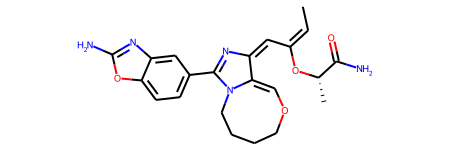

In [45]:
Chem.MolFromSmiles('C\\C=C(\\O[C@@H](C)C(N)=O)/C=c1/nc(-c2ccc3oc(N)nc3c2)n2CCCCO/C=c/1\\2')

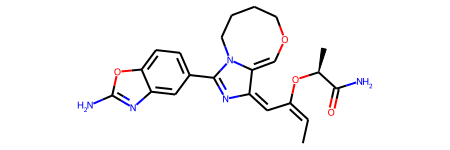

In [46]:
Chem.MolFromSmiles('C/C=C(\\C=c1\\nc(-c2ccc3oc(N)nc3c2)n2\\c1=C/OCCCC2)O[C@@H](C)C(N)=O')

In [47]:
meta_data['MTOR']

['CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)cc1',
 'COc1ccc(CCN(C)CCCC(C#N)(c2ccc(OC)c(OC)c2)C(C)C)cc1OC',
 'CS(=O)c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)[nH]2)cc1',
 'CNC(=O)Nc1ccc(-c2nc(N3CC4CCC(C3)O4)c3cnn(C4CCC5(CC4)OCCO5)c3n2)cc1',
 'CN1C2CCC1CC(OC(=O)c1c[nH]c3ccccc13)C2',
 'O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12',
 'OC1(c2ccc(Cl)cc2)CCN(Cc2c[nH]c3ccccc23)CC1',
 'O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12',
 'Cc1cccc(CS(=O)(=O)c2ncc(Cl)c(C(=O)Nc3nnc(C(C)C)s3)n2)c1',
 'OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1',
 'Nc1nc(Nc2ccc(S(N)(=O)=O)cc2)nn1C(=O)c1c(F)cccc1F',
 'COc1ccc(NC(=O)c2ccc(-c3ccc(-c4noc(C)n4)cc3C)cc2)cc1N1CCN(C)CC1',
 'Cn1c(=O)n(-c2ccc(C(C)(C)C#N)cc2)c2c3cc(-c4cnc5ccccc5c4)ccc3ncc21',
 'CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n2Cc1ccc(Cl)cc1',
 'Oc1ccc(Nc2nc(-c3ccc(Cl)cc3)cs2)cc1',
 'O=C1c2c(O)ccc(O)c2C(=O)c2c(NCCNCCO)ccc(NCCNCCO)c21',
 'O=c1cc(N2CCNCC2)oc2c(-c3ccccc3)cccc12',
 'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1',
 'O=c1cc(-c2cccc3

In [48]:
meta_data['HDAC1']

['CC(=O)Nc1ccc(C(=O)Nc2cc(-c3cccs3)ccc2N)cc1',
 'Nc1ccccc1NC(=O)c1ccc(CNc2nccc(-c3cccnc3)n2)cc1',
 'Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1']

In [49]:
meta_data['AKT2']

['CS(=O)c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)[nH]2)cc1',
 'Cn1cc(C=C2C(=O)Nc3cccnc32)c2ccccc21',
 'CCC(CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1',
 'COC(C(=O)N1Cc2[nH]nc(NC(=O)c3ccc(N4CCN(C)CC4)cc3)c2C1)c1ccccc1',
 'O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12',
 'COc1cc(OC)c(C=C2C(=O)Nc3ccccc32)c(OC)c1',
 'Nc1nc(Nc2ccc(S(N)(=O)=O)cc2)nn1C(=O)c1c(F)cccc1F',
 'N#CC(=Cc1ccc(O)c(O)c1)C(=O)NCc1ccccc1',
 'COc1cc(Nc2ncc(F)c(Nc3ccc4c(n3)NC(=O)C(C)(C)O4)n2)cc(OC)c1OC',
 'Oc1ccc(Nc2nc(-c3ccc(Cl)cc3)cs2)cc1',
 'O=c1cc(N2CCNCC2)oc2c(-c3ccccc3)cccc12',
 'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1',
 'O=c1cc(-c2cccc3c2Sc2ccccc2S3)oc(N2CCOCC2)c1',
 'O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12',
 'O=S(=O)(NCCNCC=Cc1ccc(Br)cc1)c1cccc2cnccc12',
 'CNC(=O)c1ccccc1Sc1ccc2c(C=Cc3ccccn3)n[nH]c2c1',
 'CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12',
 'CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)c2ccccc21',
 'O=C1NC(=O)c2cc(Nc3ccc(F)cc3)c(Nc3ccc(F)cc3)cc21',
 'CC(C)N(CCC(=O)c1ccc2ccccc2c1)Cc1ccccc1',
 'Cc1nc(Nc2ncc(C(=O)

In [61]:
assert [Chem.MolToSmiles(Chem.MolFromSmiles(smi), canonical=True) for smi in meta_data['AKT2']] == meta_data['AKT2']

In [62]:
check_recorded('AKT2')

([],
 ['CNC(=O)CC1CC(c2ccc(F)c(F)c2)C(NC(=O)c2cc(-c3c(Cl)cnn3C)c(Cl)o2)CN1',
  'NC1(c2ccc(-c3nc4n(c3-c3ccccc3)COc3cccc(F)c3-4)cc2)CC(O)(C2CC2)C1',
  'NCC(Cc1ccccc1C(F)(F)F)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'NCC(NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1)c1ccccc1',
  'CCONC(=O)c1ccc2c(c1)OCn1c-2nc(-c2ccc(C3(N)CC(C)(O)C3)cc2)c1-c1ccccc1',
  'NCC(Cc1ccc(F)cc1)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'NCC(Cc1cccc(F)c1)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'NCC(CC1CCCCC1)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)nc(OCC(N)Cc3ccccc3)cc21',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)nc(OCCN)cc21',
  'NCC(Cc1cccc(C(F)(F)F)c1)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)nc(OC(CN)c3ccccc3)cc21',
  'NCC(Cc1ccc(C(F)(F)F)cc1)NC(=O)c1cc(Br)c(-c2ccnc3[nH]ccc23)s1',
  'CC1(O)CC(N)(c2ccc(-c3nc4n(c3-c3ccccc3)COc3cc(C(N)=O)ccc3-4)cc2)C1',
  'CC(C)Cc1nc(-c2ccc(CN3CCC(n4c(=O)[nH]c5ccccc54)CC3)cc2)c(-c2ccccc2)[nH]c1=O',
  'NC1(c2ccc(-c3nc4n(c3-c3ccc

In [63]:
check_recorded('AURKB')

([],
 ['COc1cc2c(Nc3cc(CC(=O)Nc4cccc(F)c4)n[nH]3)ncnc2cc1OCCCN1CCC(CO)CC1',
  'COc1cc2c(Nc3cc(CC(=O)Nc4cccc(F)c4)n[nH]3)ncnc2cc1OCCCN(C)CCO',
  'CCN(CCO)CCCOc1cc2ncnc(Nc3cnn(CC(=O)Nc4cccc(F)c4F)c3)c2cc1OC',
  'CNc1nc(C)c(-c2ccnc(Nc3cc(OC)c(OC)c(OC)c3)n2)s1',
  'COc1cc2c(Nc3cnn(CC(=O)Nc4cccc(F)c4)c3)ncnc2cc1OCCCN1CCCC1CO',
  'CCC(=O)Nc1ccc(Sc2nc(Nc3cc(C)n[nH]3)cc(N3CCN(C(C)(C)C)CC3)n2)cc1',
  'COc1cc2c(Nc3cc(CC(=O)Nc4cccc(F)c4F)n[nH]3)ncnc2cc1OCCCN(CCO)CC(C)C',
  'CCN(CCCOc1ccc2c(Nc3cc(CC(=O)Nc4cccc(F)c4)n[nH]3)ncnc2c1)CCOP(=O)(O)O',
  'CCN(CCO)CCCOc1ccc2c(Nc3cc(CC(=O)Nc4cccc(F)c4F)n[nH]3)ncnc2c1',
  'CCC(=O)Nc1ccc(Sc2nc(Nc3cc(C)n[nH]3)cc(N3CCCCC3)n2)cc1',
  'COc1cc2c(Nc3cc(CC(=O)Nc4cccc(F)c4F)n[nH]3)ncnc2cc1OCCCN1CCC(O)CC1',
  'COc1cc(Nc2nccc(-c3sc(C)nc3C)n2)cc(OC)c1OC',
  'OC1CCC(Nc2nc(Nc3ncc(Cc4ccccc4)s3)cc(C(F)(F)c3ccc(F)cc3)n2)CC1',
  'CCCN(CCO)CCCOc1ccc2c(Nc3cc(CC(=O)Nc4cccc(F)c4F)n[nH]3)ncnc2c1',
  'CCCN(CCO)CCCOc1cc2ncnc(Nc3cc(CC(=O)Nc4cccc(F)c4F)n[nH]3)c2cc1OC',
  'COc1cc2c(Nc3

In [64]:
check_recorded('MTOR')

([],
 ['CC=CCC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(Cc2ccccc2)C(=O)NC(CO)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C',
  'COC1CC(CC(C)C2CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C(C)C(OCc3ccccc3)CC3CCC(C)C(O)(O3)C(=O)C(=O)N3CCCCC3C(=O)O2)CCC1O',
  'COCC1CN(Cc2ccccn2)C(=O)C2CCCC1N2S(=O)(=O)c1cc(Cl)cc(Cl)c1',
  'COC1CC(CC(C)C2CC(=O)C(C)C=C(C)C(O)C(OC)C(=O)C(C)CC(C)C=CC=CC=C(C)C(OCc3ccc(Cl)cc3)CC3CCC(C)C(O)(O3)C(=O)C(=O)N3CCCCC3C(=O)O2)CCC1O',
  'C=CCC1C=C(C)CC(C)CC(OC)C2OC(O)(C(=O)C(=O)N3CCCCC3C(=O)OC(C(C)=CC3CCC(O)C(OC)C3)C(C)C(O)CC1=O)C(C)CC2OC',
  'CCC(C)(C)C(=O)C(=O)N1CCCC1C(=O)NCCCc1ccccc1',
  'C=CC1CN(CC(=O)OCC)C(=O)C2CCCC1N2S(=O)(=O)c1cc(Cl)cc(Cl)c1',
  'CC(C)(C)C(=O)C(=O)N1CCCCC1C(=O)OC(CCCc1ccccc1)CCCc1ccccc1',
  'COC1CC2CCC(C)C(O)(O2)C(=O)C(=O)N2CCCCC2C(=O)OC(C(C)CC2CCC(O)C(OC)C2)CC(O)CC(=O)C(C)C=C(C)C(O)CC(=O)C(C)CC(C)C=CC=CC=C1C',
  'COc1cc(C(=O)C(=O)N2CCCCC2C(=O)OC(CCCc2ccccc2)CCCc2ccccc2)cc(OC)c1OC',
 

In [65]:
check_recorded('TP53')

([],
 ['CCC(C(=O)OC(C)(C)C)N1C(=O)C(C)(CC(=O)O)CC(c2cccc(Cl)c2)C1c1ccc(Cl)cc1',
  'CCCSc1cc(C(=O)O)c(O)c(I)c1-n1cccc1',
  'COc1ccc(-c2cc(C(=O)O)c(O)c(I)c2-n2cccc2)cc1',
  'CCC(CO)N1C(=O)C(C)(CC(=O)O)CC(c2cccc(Cl)c2)C1c1ccc(Cl)cc1',
  'CCn1c2ccccc2c2cc(CNC)ccc21',
  'COc1ccc(C2=NC(c3ccc(Cl)cc3)C(c3ccc(Cl)cc3)N2C(=O)N2CCNC(=O)C2)c(OC(C)C)c1',
  'Cc1cc2c(cc1F)OC(c1ccc(Br)cc1)C1=C2N(C)c2ncnn2C1c1ccc(Br)cc1',
  'CN1C2=C(C(c3ccc(Cl)cc3)Oc3ccccc32)C(c2ccc(Br)cc2)n2ncnc21',
  'O=c1[nH][nH]c2c(I)c(-n3cccc3)c(I)cc12',
  'CC(C)COc1cc(C(=O)O)c(O)c(I)c1-n1cccc1',
  'COc1ccc(CCc2nc3cc(-c4c(C)noc4C)ccc3n2CC(C)N2CCOCC2)cc1Cl',
  'CCCCCC(OC1OC(C(O)CO)C(O)C1O)c1c(O)cc2c(c1O)C(=O)c1c(O)cc(O)cc1C2=O',
  'CCC(C(=O)OC(C)(C)C)N1C(=O)C(C)(Cc2nnn[nH]2)CC(c2cccc(Cl)c2)C1c1ccc(Cl)cc1',
  'O=C(O)c1cc(-c2ccccc2)c(-n2cccc2)c(I)c1O',
  'O=C(O)c1cc(OCCO)c(-n2cccc2)c(I)c1O',
  'O=C(O)CC1CC(c2cccc(Cl)c2)C(c2ccc(Cl)cc2)N(CC2CC2)C1=O',
  'CCN(CC)C1CCN(Cc2cc(C#CCNc3ccccc3)cc(I)c2O)CC1',
  'CNC(=O)c1cc(I)c(-n2cccc2)c(I)c1O

In [66]:
check_recorded('HDAC1')

(['CC(=O)Nc1ccc(C(=O)Nc2cc(-c3cccs3)ccc2N)cc1',
  'Nc1ccccc1NC(=O)c1ccc(CNC(=O)OCc2cccnc2)cc1'],
 ['CC(=O)Nc1ccc(C(=O)Nc2ccc(F)cc2N)cc1',
  'CC(C)CC1NC(=O)C2CSSCCC=CC(CC(=O)NC(C(C)C)C(=O)N2)OC(=O)CNC1=O',
  'CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC1CC1)CC2)c1ncc(-c2cc3ccccc3nc2OC)[nH]1',
  'O=C(CCCCCn1nncc1-c1ccccc1)NO',
  'CC(CCCCC(=O)NO)Nc1c(Nc2ccc(C(F)(F)F)cc2)c(=O)c1=O',
  'CN(Cc1nc2c(N3CCOCC3)nc(-c3cccnc3)nc2n1C)c1ncc(C(=O)NO)cn1',
  'O=C(CCCCCNc1c(NC2CCCCC2)c(=O)c1=O)NO',
  'COc1ccc2[nH]c(C)c(CC(=O)NC(CCCCCC(=O)NO)C(=O)NCCc3c(-c4ccccc4)[nH]c4ccccc34)c2c1',
  'CCC(=O)CCCCCC1NC(=O)C2CC23CCN(CCOCCn2ccc4cc(ccc4c2=O)-c2cnc1[nH]2)CC3',
  'O=C(CCCCCCC(=O)Nc1ccc(C2OC(CSc3nc(-c4ccccc4)c(-c4ccccc4)o3)CC(c3ccc(CO)cc3)O2)cc1)NO',
  'CCC(C)C1NC(=O)C2CSSCCC=CC(CC(=O)NC(CCSC)C(=O)N2)OC(=O)CC1O',
  'CN1CCC(CNC(=O)c2cccc(-c3noc(C(F)(F)F)n3)c2)(c2nc(-c3ccccc3)cs2)CC1',
  'Cc1ccccc1C(C)Nc1c(NCCCCCC(=O)NO)c(=O)c1=O',
  'CCN(CC)Cc1ccc2cc(COC(=O)Nc3ccc(C(=O)NO)cc3)ccc2c1',
  'CCC(=O)CCCCCC(NC(=O)C1CC12CCN(CC)